[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/blob/master/Jupyter%20Notebooks/Paper%20-%20Figure%205%20-%20Percentage%20of%20most%20frequent%20deltas.ipynb)

In [1]:
import sys
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_dir = Path('data')
delta_frequency_path = Path.joinpath(data_dir, Path('delta_frequency_under_1b.csv'))

In [3]:
try:
    df = pd.read_csv(delta_frequency_path)
except FileNotFoundError as error:
        print(error)
        in_colab = 'google.colab' in sys.modules
        if in_colab:
            print('running on colab, downloading data to session...')
            !mkdir data
            # Download delta_frequency_under_1b.csv
            !wget https://bit.ly/3zcycOz -O data/delta_frequency_under_1b.csv
        else:
            print('Please download required data from paper repo')

In [4]:
df.head(4)

,delta,delta_log2,frequency,density,cumulative_density
0,2,1.000000,2047829,0.040274,0.040274
1,1/2,-1.000000,2046288,0.040244,0.080518
2,3/2,0.584963,1460663,0.028726,0.109244
3,2/3,-0.584963,1460572,0.028725,0.137968


In [5]:
data = {}
total_primes = df['frequency'].sum()
accm_density = 0
top_nums = 15
for i in range(top_nums):
    row = df.iloc[i]
    accm_density += row['density']
    data[row['delta']] = row['density']*100


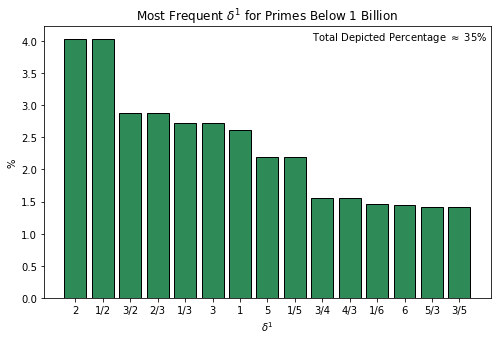

In [6]:
figsize = (8, 5)
barplot_configs = {'color': 'seagreen',
                   'edgecolor':'black'}
fig, ax = plt.subplots()
fig.set_size_inches(*figsize)
ax.bar(data.keys(), data.values(), **barplot_configs)
ax.set_title('Most Frequent $\delta^1$ for Primes Below 1 Billion')
ax.set_xlabel('$\delta^1$')
ax.set_ylabel('%')
text1 = f'Total Depicted Percentage $\\approx$ {int(accm_density*100)}%'
ax.text(0.6, 0.95, text1, color='black', transform=ax.transAxes)
plt.show()